# admcycles - a Sage package for computations in the tautological ring of the moduli space of stable curves

### Authors
Based on earlier implementation by Aaron Pixton
* Johannes Schmitt
* Jason van Zelm
* Vincent Delecroix

### How to get access
Website : [`https://gitlab.com/jo314schmitt/admcycles`](https://gitlab.com/jo314schmitt/admcycles)<br>
Online tool : [`https://cocalc.com`](https://cocalc.com) - currently slightly older version <br>
User manual : [`https://arxiv.org/abs/2002.01709`](https://arxiv.org/abs/2002.01709)

## The moduli space of stable curves

> **Definition/Theorem** ([Deligne, Mumford - 1969](https://doi.org/10.1007%2FBF02684599))<br> 
Let $g,n \geq 0$ be integers (with $2g-2+n>0$).
$$\overline{\mathcal{M}}_{g,n} = \left\{(C,p_1, \ldots, p_n) \colon \begin{array}{l}
     {C \text{ compact complex algebraic}\\
     \text{curve of }\color{red}{\text{arithmetic}}\text{ genus }g \\
     \text{with at worst }\color{red}{\text{nodal singularities}}}\\
     {p_1, \ldots, p_n \in C \text{ distinct $\color{red}{\text{smooth}}$ points}}\\
     {\color{red}{\mathrm{Aut}(C,p_1, \ldots, p_n) \text{ finite}}}
\end{array} \right\}/\text{iso}$$
Then we have
- $\overline{\mathcal{M}}_{g,n}$ is a smooth, irreducible, compact complex orbifold of dimension $\dim_\mathbb{C} \overline{\mathcal{M}}_{g,n} = 3g-3+n$.
- The subset $\mathcal{M}_{g,n}$ where the curve $C$ is smooth is dense and open and the complement $\partial \overline{\mathcal{M}}_{g,n}$ is a normal-crossing divisor.

Below we illustrate the space $\overline{\mathcal{M}}_{3,2}$.

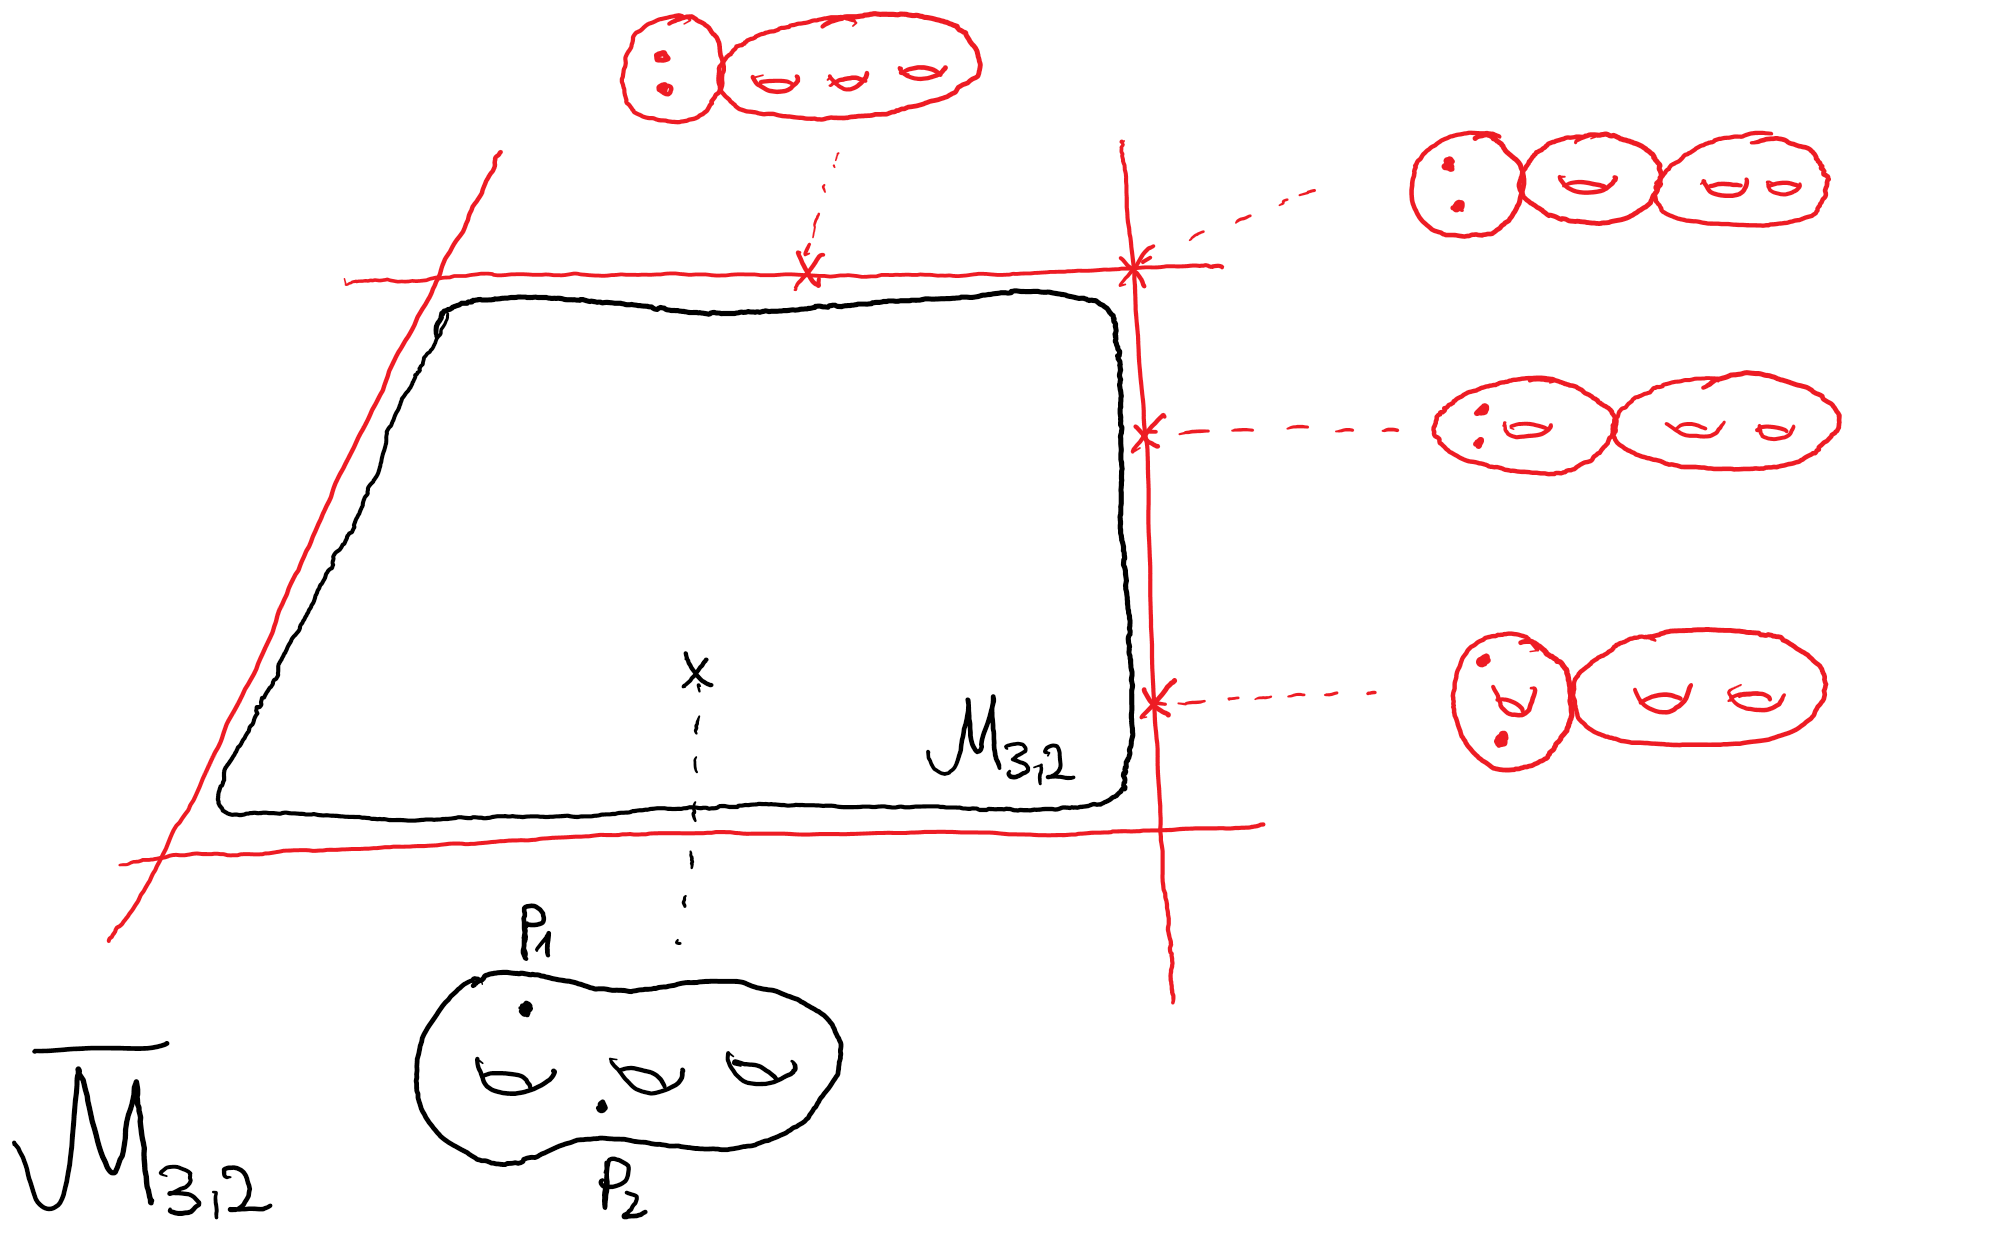

### Recursive boundary structure
To $(C,p_1, \ldots, p_n) \in \overline{\mathcal{M}}_{g,n}$ we can associate a *stable graph* $\Gamma_{(C,p_1, \ldots,p_n)}$
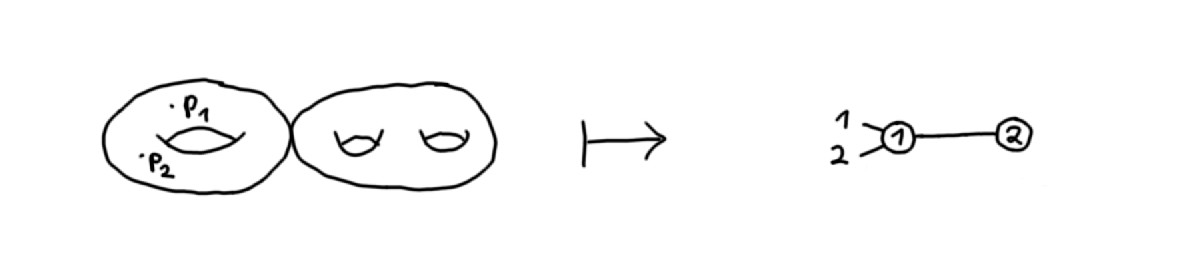

Conversely, given a stable graph $\Gamma$ we have a *gluing map*
$$\xi_\Gamma : \prod_{v \in V(\Gamma)} \overline{\mathcal{M}}_{g(v),n(v)} = \overline{\mathcal{M}}_{1,3} \times \overline{\mathcal{M}}_{2,1}\to \overline{\mathcal{M}}_{3,2}$$
<center>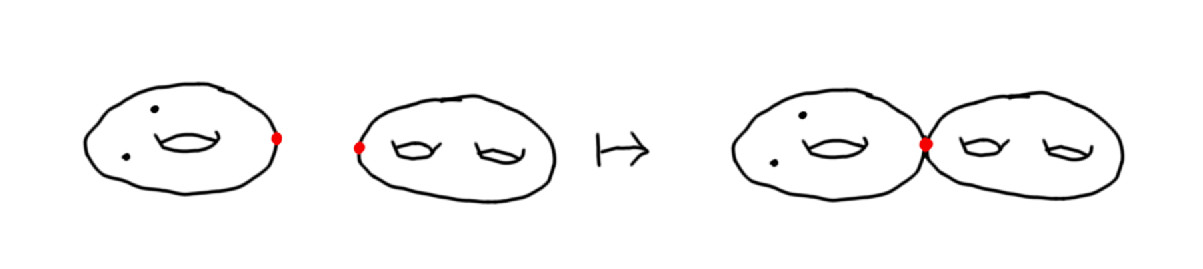</center>



> **Proposition**<br> 
The map $\xi_\Gamma$ is finite with image equal to the closure $\overline{\mathcal{M}}^\Gamma$ of
$$\mathcal{M}^\Gamma = \{(C,p_1, \ldots, p_n) : \Gamma_{(C,p_1, \ldots, p_n)} = \Gamma\}$$

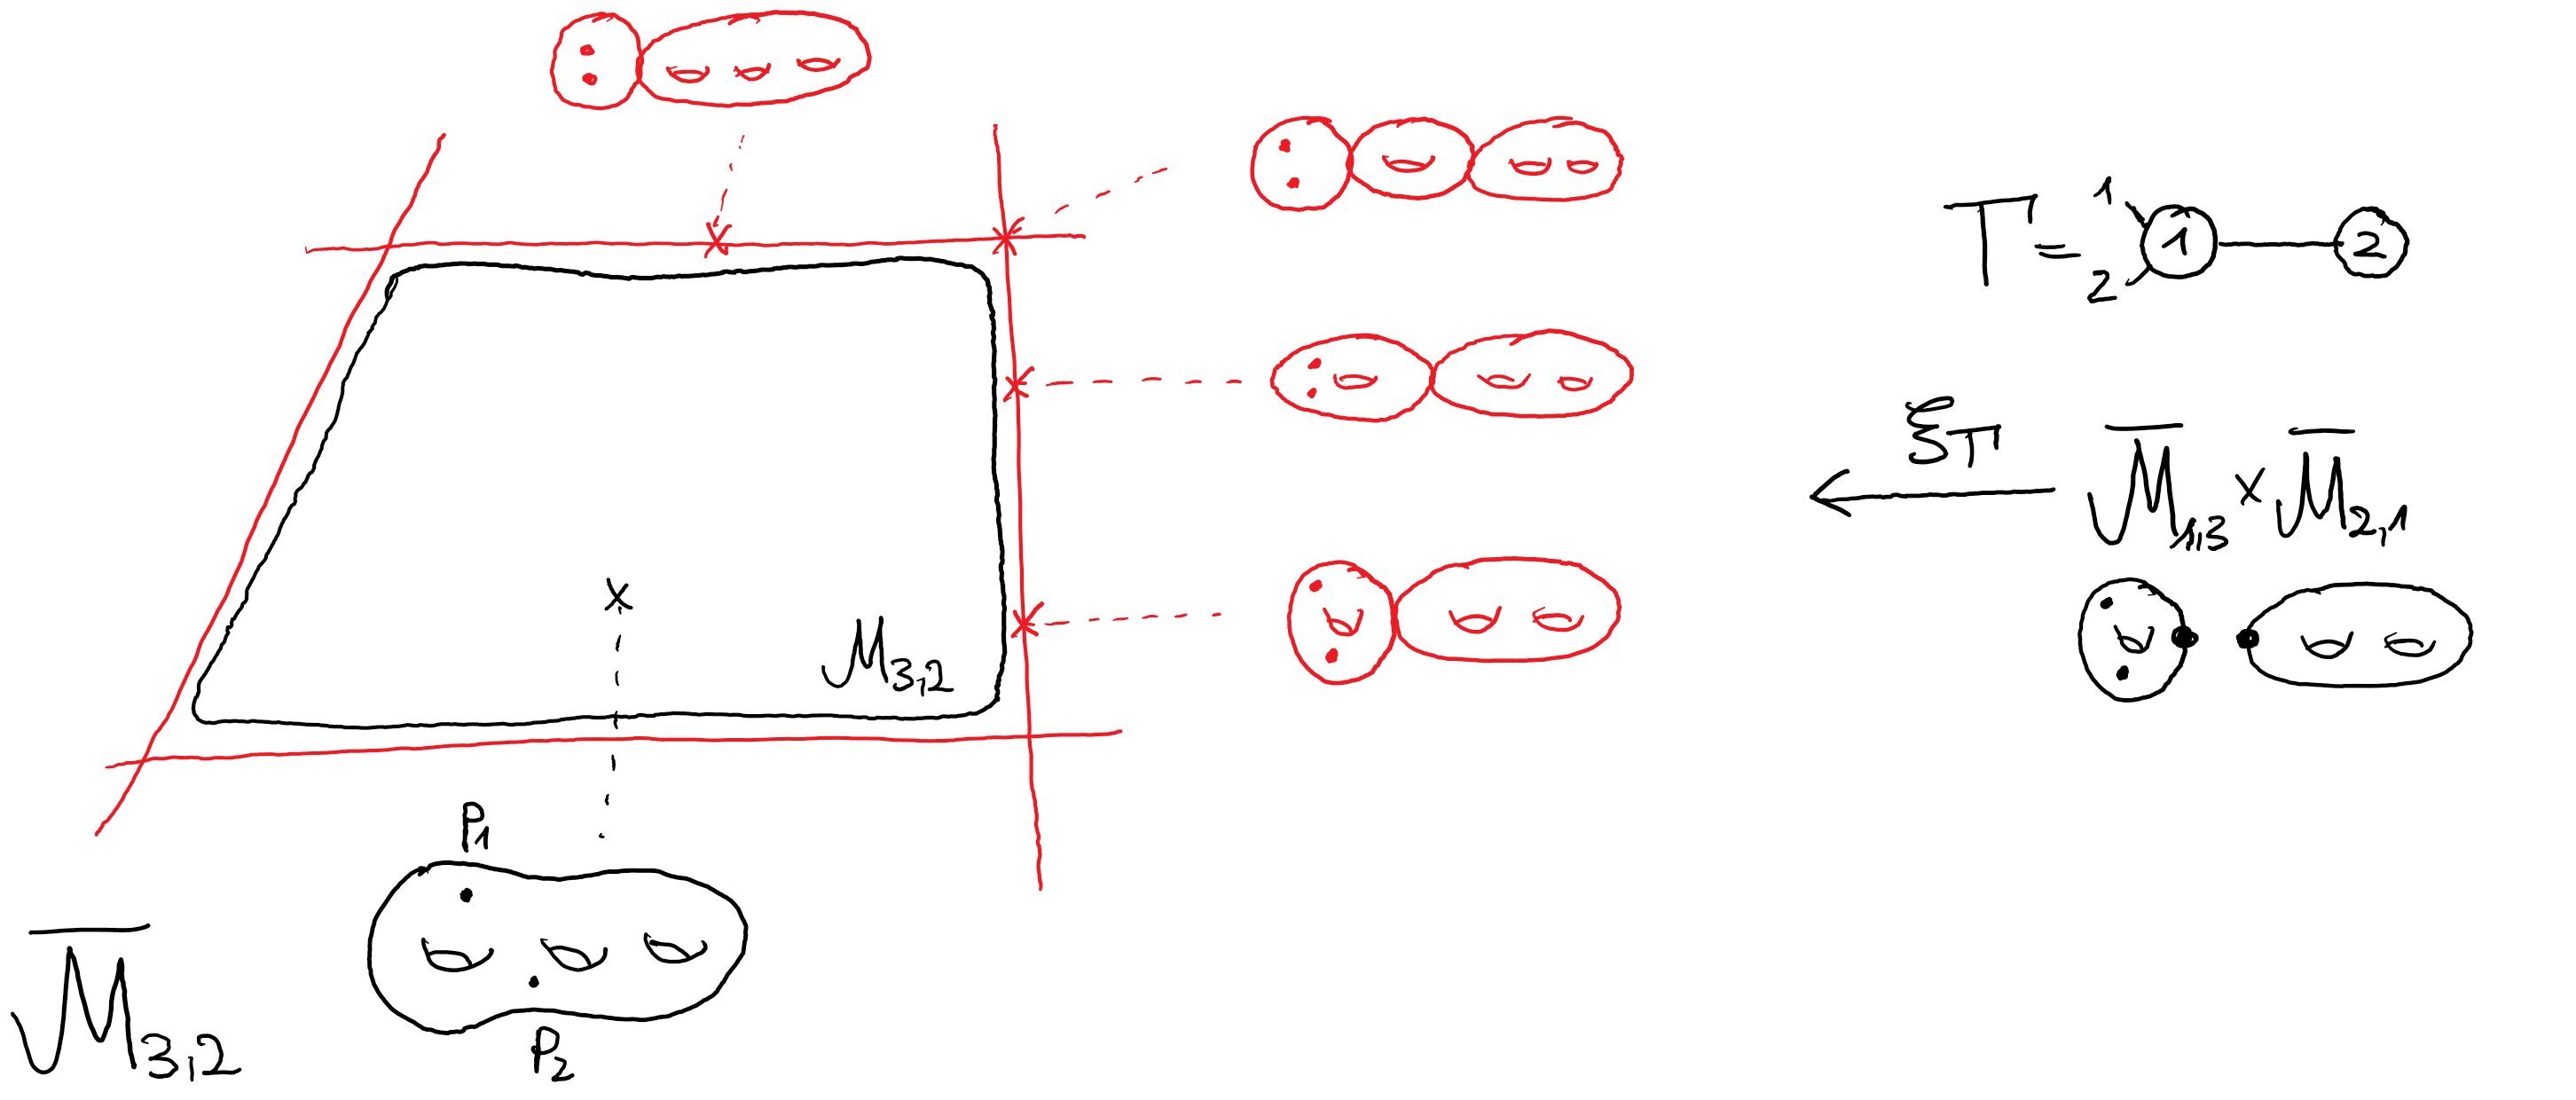

In [0]:
from admcycles import *
# list_strata(g,n,e) returns the list of stable graphs in Mbar_g,n with e edges
L = list_strata(3,2,1)
L

#### Example
The output ``[1, 2] [[1, 2, 3], [4]] [(3, 4)]`` corresponds to the stable graph
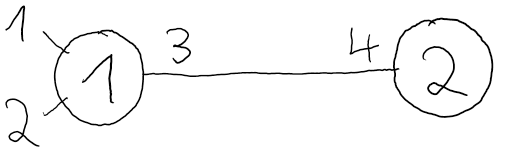

#### Exercise
Execute the cell above (which says ``from admcycles import * ...``) by clicking the grey box and then pressing ``Shift + Enter`` to start the computation.

Then, use the cell below to compute the number of stable graphs in $\overline{\mathcal{M}}_{3,2}$ with precisely 2 edges. 

(*Hint*: given a list ``L`` you can compute its length using ``len(L)``)

## The tautological ring of $\overline{\mathcal{M}}_{g,n}$
$\overline{\mathcal{M}}_{g,n}$ compact space $\implies$ the singular cohomology $H^*(\overline{\mathcal{M}}_{g,n})$ is a finite-dimensional $\mathbb{Q}$-algebra

### Generators of the tautological ring
Using the fact that $\overline{\mathcal{M}}_{g,n}$ is a moduli space, we can write down many natural cohomology classes.

> **Definition** ($\psi$-classes)<br> 
$\mathbb{L}_i \to \overline{\mathcal{M}}_{g,n}$ complex line bundle, $\mathbb{L}_i|_{(C,p_1, \ldots, p_n)} = T_{p_i}^* C$
$$\psi_i = c_1(\mathbb{L}_i) \in H^2(\overline{\mathcal{M}}_{g,n}).$$

> **Definition** ($\kappa$-classes)<br> 
Forgetful morphism $F: \overline{\mathcal{M}}_{g,n+1} \to \overline{\mathcal{M}}_{g,n}, (C,p_1, \ldots, p_n, p_{n+1}) \mapsto (C,p_1, \ldots, p_n)$ [$C$ smooth]
$$\kappa_a = F_* \left( (\psi_{n+1})^{a+1}\right) \in H^{2a}(\overline{\mathcal{M}}_{g,n}).$$

> **Definition** (The tautological ring)<br> 
The tautological ring $RH^*(\overline{\mathcal{M}}_{g,n}) \subset H^*(\overline{\mathcal{M}}_{g,n})$ is spanned as a $\mathbb{Q}$-vector subspace by elements
$$[\Gamma,\alpha]=(\xi_\Gamma)_* \left(\underbrace{\text{product of }\kappa,\psi\text{-classes}}_{\alpha}\text{ on }\prod_{v \in V(\Gamma)} \overline{\mathcal{M}}_{g(v),n(v)} \right), $$
called *decorated strata classes*.

Let's start playing around with tautological classes. We can display a list of all generators $[\Gamma, \alpha] \in RH^{2d}(\overline{\mathcal{M}}_{g,n})$ using the function ``list_tautgens(g,n,d)`` and get access to this list using ``tautgens(g,n,d)``.

In [0]:
list_tautgens(3,2,1)
T = tautgens(3,2,1)

### Intersection products
One of the basic operations in singular cohomology is the cup product of cohomology classes. The following results allows us to compute such products for decorated strata classes.

> **Theorem** ([Graber, Pandharipande - 2003](https://projecteuclid.org/euclid.mmj/1049832895))<br> 
The set of tautological classes $RH^*(\overline{\mathcal{M}}_{g,n})$ is closed under the intersection/cup product, and there exists an explicit formula
$$[\Gamma,\alpha] \cdot [\Gamma',\alpha'] = \sum \mu_i [\Gamma_i, \alpha_i]$$
with $\Gamma_i$ running over graphs which are simultaneous specializations of $\Gamma$ and $\Gamma'$.

We can look at some examples involving the generators above. 

In [0]:
T[3]*T[7] # classes of two boundary divisors, intersecting transversally

Comparing with the picture above, we can see that ``T[3]`` and ``T[7]`` are the classes of two boundary divisors, which intersect transversally in the codimension $2$ stratum associated to the stable graph above.
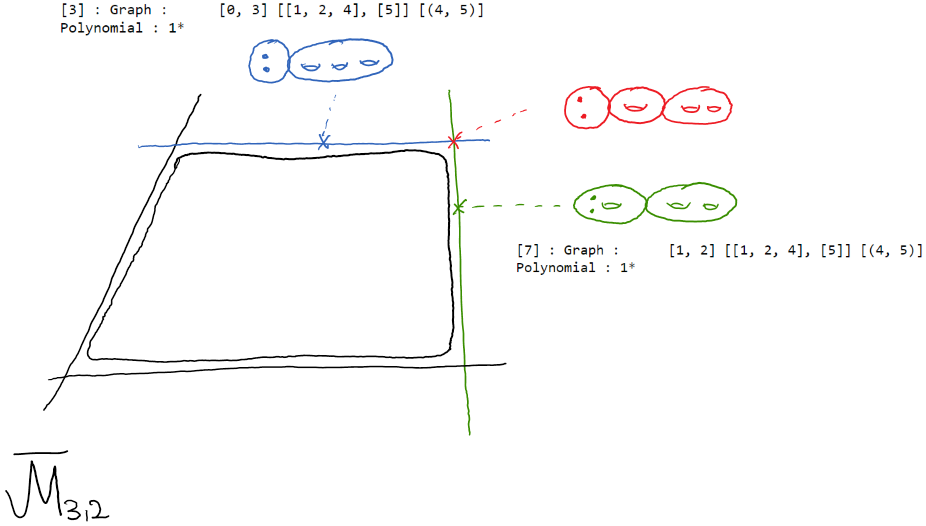

In [0]:
T[7]^2    # self-intersection formula of boundary divisor

### Intersection numbers

We can also compute actual intersection *numbers*. For this, given a tautological class ``t`` contained in $RH^{2(3g-3+n)}(\overline{\mathcal{M}}_{g,n})$, we can compute its degree
$$\int_{\overline{\mathcal{M}}_{g,n}} \mathrm{t} = \mathrm{deg}(\mathrm{t} \frown [\overline{\mathcal{M}}_{g,n}])$$
using ``t.evaluate()``. This is based on a conjecture by [[Witten - 1991](https://www.intlpress.com/site/pub/files/_fulltext/journals/sdg/1990/0001/0001/SDG-1990-0001-0001-a005.pdf)], proved by [[Kontsevich - 1992](https://projecteuclid.org/download/pdf_1/euclid.cmp/1104250524)].

#### Exercise
Use the cell below to compute the integral
$$\int_{[\overline{\mathcal{M}}_{3,2}]} \psi_1^6 \psi_2^2.$$
*Hint*: You can get access to the classes $\psi_i$ either from the list ``T`` above, or using the function ``psiclass(i,g,n)``.

### Tautological relations

An important aspect of the tautological ring is that the generators $[\Gamma, \alpha]$ are not necessarily linearly independent. A linear relation between them is called a *tautological relation*. A lot of work has gone into studying such relations ([Faber, Zagier - 2000]; [[Pandharipande, Pixton - 2010](https://arxiv.org/abs/1301.4561)]; [[Pixton - 2012](https://arxiv.org/abs/1207.1918)]; [[Pandharipande, Pixton, Zvonkine - 2013](https://doi.org/10.1090/S0894-0347-2014-00808-0)]), finally leading to a conjectural description of all tautological relations, originally proposed by Pixton.

These so-called generalized Faber-Zagier relations $R^{\text{FZ}}$ have been implemented by Pixton in the predecessor of ``admcycles`` and are accessible in ``admcycles`` in two ways: given a tautological class ``t`` in $RH^{2d}(\overline{\mathcal{M}}_{g,n})$ you can

- check if it is contained in the system $R^{\text{FZ}}$ (and thus zero) by calling ``t.is_zero()``,
- express it in a basis of the vector space $$\mathrm{span}([\Gamma, \alpha] : \Gamma, \alpha) / R^{\text{FZ}},$$ which is conjecturally isomorphic to $RH^{2d}(\overline{\mathcal{M}}_{g,n})$, by calling ``t.toTautbasis()``.

#### Exercise
There exists a linear relation between the classes
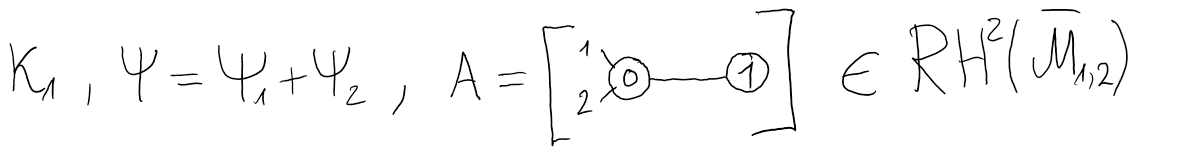

Find the relation using the function ``toTautbasis()`` and confirm it using ``is_zero``.

*Note*: This task may require more than one command. You can create new cells for computations via the menu ``Insert->Insert Cell Above/Below`` at the top of the screen.

In [0]:
kappa = kappaclass(1,1,2)  # kappaclass(a,g,n) computes kappa_a on Mbar_{g,n}
psi = psiclass(1,1,2) + psiclass(2,1,2)
A = StableGraph([0,1],[[1,2,3],[4]],[(3,4)]).boundary_pushforward()

The functions ``toTautbasis`` and ``is_zero`` are perfectly fine for *confirming* that classes are zero, since ``R.is_zero() == True`` means that ``R`` is a combination of known tautological relations, and thus indeed vanishes.

But what if we want to show that things *don't* vanish? Since the generalized Faber-Zagier relations are only *conjecturally* complete, an output ``R.is_zero() == False`` just tells us that ``R`` is not zero *assuming the conjecture*. 

To get a non-conditional result, i.e how to show that in the exact sequence
$$0 \to K \to \mathrm{span}([\Gamma, \alpha] : \Gamma, \alpha) / R^{\text{FZ}} \to RH^{2d}(\overline{\mathcal{M}}_{g,n}) \to 0 \quad (*)$$
the kernel $K$ vanishes (and thus that $R^{\text{FZ}}$ indeed give all relations)? We can use the following strategy: there exists an intersection pairing
\begin{align*}
RH^{2d}(\overline{\mathcal{M}}_{g,n}) \otimes RH^{2(3g-3+n-d)}(\overline{\mathcal{M}}_{g,n}) &\to \mathbb{Q},\\
[\Gamma_1, \alpha_1] \otimes [\Gamma_2, \alpha_2] &\mapsto \int_{[\overline{\mathcal{M}}_{g,n}]} [\Gamma_1, \alpha_1] \cdot [\Gamma_2, \alpha_2]\,.
\end{align*}

As we have seen in the last sections, we can explicitly compute all pairings appearing above using ``admcycles`` and obtain a matrix $M$ whose entries are 
$$ M_{[\Gamma_1, \alpha_1], [\Gamma_2, \alpha_2]}  = \int_{[\overline{\mathcal{M}}_{g,n}]} [\Gamma_1, \alpha_1] \cdot [\Gamma_2, \alpha_2]\,,$$
and this matrix satisfies
$$\mathrm{rank}\, M \leq \dim  RH^{2d}(\overline{\mathcal{M}}_{g,n}).$$
Then if we check
$$\mathrm{rank}\, M = \dim \mathrm{span}([\Gamma, \alpha] : \Gamma, \alpha) / R^{\text{FZ}}$$
it follows that in $(*)$ indeed the kernel $K$ must vanish.

#### Example : $RH^2(\overline{\mathcal{M}}_{1,2})$
Let's see this in practice: for the classes in $RH^2(\overline{\mathcal{M}}_{1,2})$ considered above, we saw that ``toTautbasis()`` gave out vectors of length $2$, so
$$\dim \mathrm{span}([\Gamma, \alpha] : \Gamma, \alpha) / R^{\text{FZ}} = 2 $$
in this case. Since $3g-3+n = 2$ in this case, the relevant pairing is

$$RH^{2}(\overline{\mathcal{M}}_{g,n}) \otimes RH^{2}(\overline{\mathcal{M}}_{g,n}) \to \mathbb{Q}\,.$$

Let's compute the matrix $M$ and its rank:

In [0]:
D = tautgens(1,2,1)  # tautgens(g,n,d) lists of all generators [Gamma_i, alpha_i] in RH^{2d}(Mbar_{g,n})
pairings = [[(a*b).evaluate() for a in D] for b in D]
M = matrix(QQ, pairings)
M

In [0]:
M.rank()

So indeed we get the equality
$$\mathrm{rank}\, M = \dim \mathrm{span}([\Gamma, \alpha] : \Gamma, \alpha) / R^{\text{FZ}} = 2$$
and thus we can be sure that the system $R^{\text{FZ}}$ is complete in this case.

## Natural cycle classes on the moduli space of stable curves
Using the fact that $\overline{\mathcal{M}}_{g,n}$ is a moduli space, there are many ways to construct interesting cohomology classes on it. Many (though not all) of them actually result in tautological classes, and again many (though not all) of these have been implemented in ``admcycles``.

### A) Cycles associated to closed subsets
For $S \subset \overline{\mathcal{M}}_{g,n}$ a closed, algebraic subset of $\mathbb{C}$-codimension $d$, there exists a fundamental class
    $$[S] \in H_{\dim - 2d}(\overline{\mathcal{M}}_{g,n}) \cong H^{\dim - 2d}(\overline{\mathcal{M}}_{g,n})^\vee \underset{\mathrm{PD}}{\cong} H^{2d}(\overline{\mathcal{M}}_{g,n}),$$
where $\mathrm{PD}$ is the isomorphism from *Poincaré duality*.

#### Example : Hyperelliptic cycles
An important example are the loci of *hyperelliptic curves*

\begin{equation*}
\mathrm{Hyp}_{g,n,2m} = \left\{(C,p_1,\ldots, p_n, q_1, q_1', \ldots, q_m, q_m') : \begin{array}{c} C \text{ hyperelliptic},\\p_i\text{ Weierstrass points},\\ q_j, q_j' \text{ hyperelliptic conjugate}\end{array} \right\} \subset \mathcal{M}_{g,n+2m}
\end{equation*}

Then, [[Faber, Pandharipande - 2005](https://doi.org/10.4171/JEMS/20)] showed that the fundamental classes of the closures

\begin{align*}
[\overline{\mathrm{Hyp}}_{g,n,2m}] \in H^*(\overline{\mathcal{M}}_{g,n+2m}),
\end{align*}

are always tautological. In [[Schmitt, van Zelm - 2018](https://arxiv.org/pdf/1808.05817.pdf)] with Jason van Zelm we give an algorithm to compute intersection numbers of the hyperelliptic cycles with tautological classes. Using these numbers, the package `admcycles` can compute them (in many cases) via the function `Hyperell(g,n,m)`.

#### Example: Strata of differentials
Given $\textbf{a}=(a_1, \ldots, a_n) \in \mathbb{Z}^n$ with $\sum_i a_i = 2g-2$, we consider the locus
\begin{align*}
\mathcal{H}_g(\textbf{a}) &= \left \{(C,p_1, \ldots, p_n) : \omega_C \cong \mathcal{O}_C \left( \sum_{i=1}^n a_i p_i \right) \right \} \\
&=\left \{(C,p_1, \ldots, p_n) : \begin{array}{c} \exists\, \eta \text{ meromorphic differential on $C$}\\\text{ with }\mathrm{div}(\eta) =\sum_{i=1}^n a_i p_i  \end{array} \right \}\subseteq \mathcal{M}_{g,n}.
\end{align*}
Then $\mathcal{H}_g(\textbf{a})$ is a closed algebraic subset of $\mathcal{M}_{g,n}$ and taking the fundamental class of the closure $\overline{\mathcal{H}}_g(\textbf{a})$, we obtain cohomology classes
$$[\overline{\mathcal{H}}_g(\textbf{a})] \in H^*(\overline{\mathcal{M}}_{g,n}).$$

These classes have been studied intensely in the last couple of years. Some highlights:
- In the appendix of the paper [[Farkas, Pandharipande - 2015](https://doi.org/10.1017/S1474748016000128)], Janda, Pandharipande, Pixton and Zvonkine wrote down a conjectural formula
$$[\overline{\mathcal{H}}_g(a_1, \ldots, a_n)] + \sum \text{(boundary corrections)} = \mathrm{DR}_g(a_1+1, \ldots, a_n+1)$$
relating the classes of strata of meromorphic differentials to the so-called *double ramification cycles*. These DR cycles are computed  by an explicit formula in the tautological ring proposed by Pixton. This conjecture was recently proven by combining the results of papers [[Holmes, Schmitt - 2019](https://arxiv.org/abs/1909.11981)], [[Bae, Holmes, Pandharipande, Schmitt, Schwarz - 2020](https://arxiv.org/abs/2004.08676)]. The above formula can be used to recursively compute *all* cycles $[\overline{\mathcal{H}}_g(a_1, \ldots, a_n)]$, both in the holomorphic and meromorphic case. 
This has been implemented in the function ``Strataclass(g,1,(a1, ..., an))``.

In [0]:
H = Strataclass(2,1,(2,))             # computes closure of {(C,p) : omega_C = O_C(2p)}
Hpush = H.forgetful_pushforward([1])  # computes pushforward under pi : Mbar_{2,1} -> Mbar_2
Hpush.simplify()

In [0]:
H2 = Hyperell(2,1)                    # computes closure of {(C,p) : p Weierstrass point}
(H - H2).is_zero()

- The strata $\overline{\mathcal{H}}_g(\textbf{a})$ themselves were studied in a series of papers by Bainbridge, Chen, Gendron, Grushevsky, Möller ([[BCGGM - 2018](https://doi.org/10.1215/00127094-2018-0012)], [[BCGGM - 2019](https://doi.org/10.14231/ag-2019-011)], [[BCGGM - 2020](https://arxiv.org/abs/1910.13492)]). In particular, the authors define a smooth compact moduli space
$$ \mathcal{MS}_g(\textbf{a}) \to \overline{\mathcal{H}}_g(\textbf{a}),$$
sitting proper, birationally over $\overline{\mathcal{H}}_g(\textbf{a})$, called the space of *multiscale differentials*. They describe the boundary strata of $\mathcal{MS}_g(\textbf{a})$ (and thus of $\overline{\mathcal{H}}_g(\textbf{a})$) in terms of certain *enhanced level graphs*.
- The intersection theory and tautological ring of $\mathcal{MS}_g(\textbf{a})$ have been implemented by [[Costantini, Möller, Zachhuber - 2020](https://arxiv.org/abs/2006.12815)] in an extension/sub-package of ``admcycles`` called ``diffstrata``. They use this in a second paper [[Costantini, Möller, Zachhuber - 2020](http://arxiv.org/abs/2006.12803)] to compute the (orbifold) Euler characteristics of the open strata ${\mathcal{H}}_g(\textbf{a})$ in a range of examples.

In [0]:
from admcycles.diffstrata import Stratum
X = Stratum((2,))
X.euler_characteristic()

### B) Lambda classes (and generalizations)
On $\overline{\mathcal{M}}_{g,n}$ there exists a vector bundle $\mathbb{E}_g$, called the *Hodge bundle*, with fibres
$$\mathbb{E}_g|_{(C,p_1, \ldots, p_n)} = H^0(C, \omega_C).$$
The Chern classes
$$\lambda_i = c_i(\mathbb{E}_g) \in H^{2i}(\overline{\mathcal{M}}_{g,n})$$
are called the *$\lambda$-classes*. They are tautological, with an explicit formula first computed by [[Mumford - 1983](https://doi.org/10.1007/978-1-4757-9286-7_12)], and can be computed in terms of generators $[\Gamma, \alpha]$ using ``lambdaclass(i,g,n)``.

#### Exercise
A special case of the main result of [[Faber, Pandharipande - 2000](https://doi.org/10.1007/s002229900028)] is that the generating series
$$F(t) = 1 + \sum_{g > 0} t^{2g} \int_{\overline{\mathcal{M}}_{g,1}} \psi_1^{2g-2} \lambda_g$$
is given by
$$F(t) = \frac{t/2}{\sin(t/2)}.$$
Check their result for $g=2$.

*Hint*: To get you started, I compute the expansion of $F$ at $t=0$ below.

In [0]:
R.<t> = PowerSeriesRing(QQ)
F = (t/2)/sin(t/2); F

Note that for the universal curve $\pi : \overline{\mathcal{C}}_{g,n} \to \overline{\mathcal{M}}_{g,n}$ and the relative dualizing line bundle $\omega_\pi$ of this morphism, we have
$$\mathbb{E}_g = R^0 \pi_* \omega_\pi.$$
The paper [[Pagani, Ricolfi, van Zelm - 2019](https://arxiv.org/abs/1809.10668)] generalizes the $\lambda$-classes and computes, for an *arbitrary* line bundle $\mathcal{L}$ on $\overline{\mathcal{C}}_{g,n}$ the Chern classes 
$$c_i(R^\bullet \pi_* \mathcal{L})$$
of the derived pushforward of $\mathcal{L}$ by $\pi$. In fact, ``admcycles`` had a hand in this: the original version [[Pagani, Ricolfi - 2018](https://arxiv.org/abs/1809.10668v1)] of the paper missed some terms in the computation, which was discovered by van Zelm using ``admcycles``.

## Formulas for lambda-classes 
### (ongoing research with R. Pandharipande, S. Molcho)
As mentioned before, there is a computation of Mumford, giving a formula for the $\lambda$-classes
$$\lambda_i = c_i(\mathbb{E}_g) \in H^{2i}(\overline{\mathcal{M}}_{g,n})\,.$$
The formula following by Mumford's computation is reasonably nice, but it does feature some slightly complicated terms. However, we could hope for something better! Consider the open subset $\mathcal{M}_{g,n}^{\mathrm{ct}}$ of curves $(C,p_1, \ldots, p_n)$ such that the stable graph of $C$ is a tree (i.e. contains no circular path). Then there exists a class $\theta \in RH^2(\overline{\mathcal{M}}_{g,n})$ such that
$$\lambda_g = \frac{1}{g!} \theta^g \in H^{2g}(\mathcal{M}_{g,n}^{\mathrm{ct}})\,. $$
So, up to a scalar factor, the class $\lambda_g$ is a power of a divisor class! However, it turns out that this equality does *not* hold in general on the whole of $\overline{\mathcal{M}}_{g,n}$.

What we can show now is that such a formula *cannot work at all* if $g$ is sufficiently large! To be slightly more precise, denote by
$$RH^*_{\leq k}(\overline{\mathcal{M}}_{g,n}) \subseteq RH^*(\overline{\mathcal{M}}_{g,n}) $$
the sub-$\mathbb{Q}$-*algebra* of $RH^*(\overline{\mathcal{M}}_{g,n})$ generated by elements of cohomological degree at most $2k$. In particular, $RH^*_{\leq 1}(\overline{\mathcal{M}}_{g,n})$ is the set of classes which can be written as linear combinations of products of divisor classes.

Then we have the following:
> **Theorem** (Molcho, S, Pandharipande)<br> 
For $g \geq 4$ we have
$$\lambda_g \notin RH^*_{\leq 1}(\overline{\mathcal{M}}_{g,n})$$
and for $g \geq 5$ we have
$$\lambda_g \notin RH^*_{\leq 2}(\overline{\mathcal{M}}_{g,n})\, ,$$
*assuming* that the generalized Faber-Zagier relations $R^{\text{FZ}}$ give all the relations in the spaces
$$RH^{8}(\overline{\mathcal{M}}_{4,1}) \ \text{ and }\ RH^{10}(\overline{\mathcal{M}}_{5,1}).$$
**Idea of proof**
Use ``admcycles`` to check the statement in $\overline{\mathcal{M}}_{4,1}$ and $\overline{\mathcal{M}}_{5,1}$. The assumption tells us that in the corresponding spaces ``toTautbasis()`` really *does* express $\lambda_g$ as well as elements of $RH^*_{\leq 1}(\overline{\mathcal{M}}_{g,n})$ in a basis of $RH^*(\overline{\mathcal{M}}_{g,n})$, so the statement is just linear algebra. The case of larger $g,n$ can then be shown using a small argument applying boundary gluing maps like
$$\xi : \overline{\mathcal{M}}_{5,1} \times \overline{\mathcal{M}}_{1,2} \to \overline{\mathcal{M}}_{6,1}\,, $$
using the fact that $\xi^* \lambda_6 = \lambda_5 \otimes \lambda_1$.

With the strategy discussed before, we can hopefully get rid of the assumption of the Faber-Zagier relations. The only problem is that the expected dimension of $RH^{10}(\overline{\mathcal{M}}_{5,1})$ is $1371$, so the matrix $M$ we have to compute is a matrix of size at least $1371 \times 1371$ of intersection numbers on the space $\overline{\mathcal{M}}_{5,1}$ of complex dimension $13$. This will take a bit of time and effort, but doesn't seem impossible.<br><br>

<br><br>

<center><font size="+2"><b>Thanks for your attention!</b></font></center> 

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

# Appendix

## Connection to moduli spaces of abelian varieties
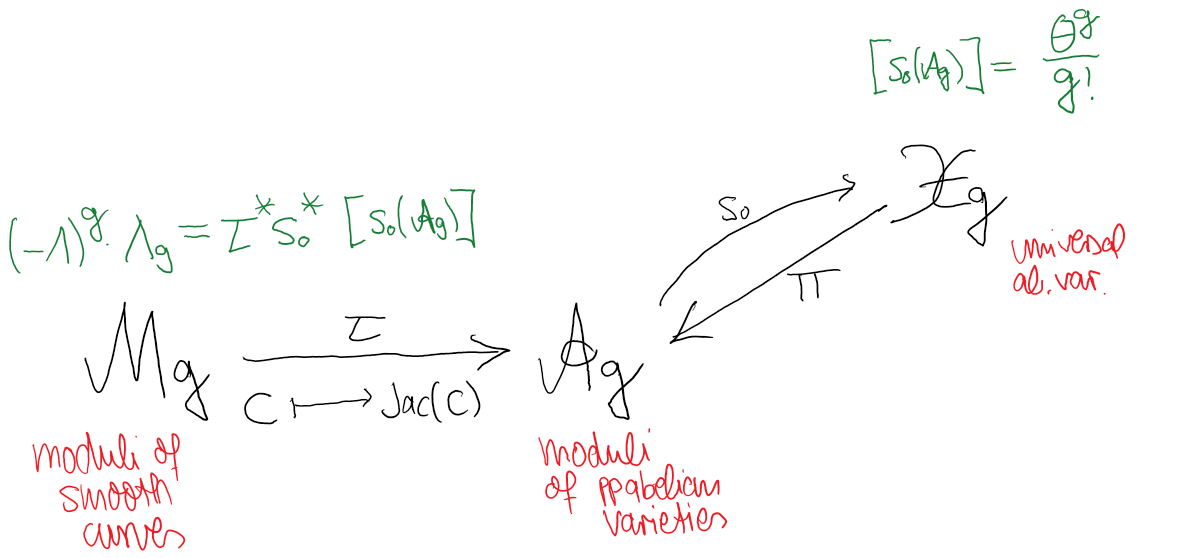

## Ongoing developments
* Johannes Schwab (PhD student of M. Möller) - Expand ``diffstrata`` for spaces of quadratic differentials
* Javier Sendra (Master student of G. Oberdieck and myself) - Implement algorithm for computing Gromow-Witten invariants of K3 surfaces described by [Maulik, Pandharipande, Thomas - 2010]
* Danilo Lewanski (Postdoc, IPhT Paris), Zekun Ji (Master student of myself) - Exploring ELSV type formulas for various kinds of Hurwitz numbers (double Hurwitz numbers, r-Hurwitz numbers)

### Exercise
Verify one of the most important tautological relations, called the *WDVV-relation* on the space $\overline{\mathcal{M}}_{0,4}$:

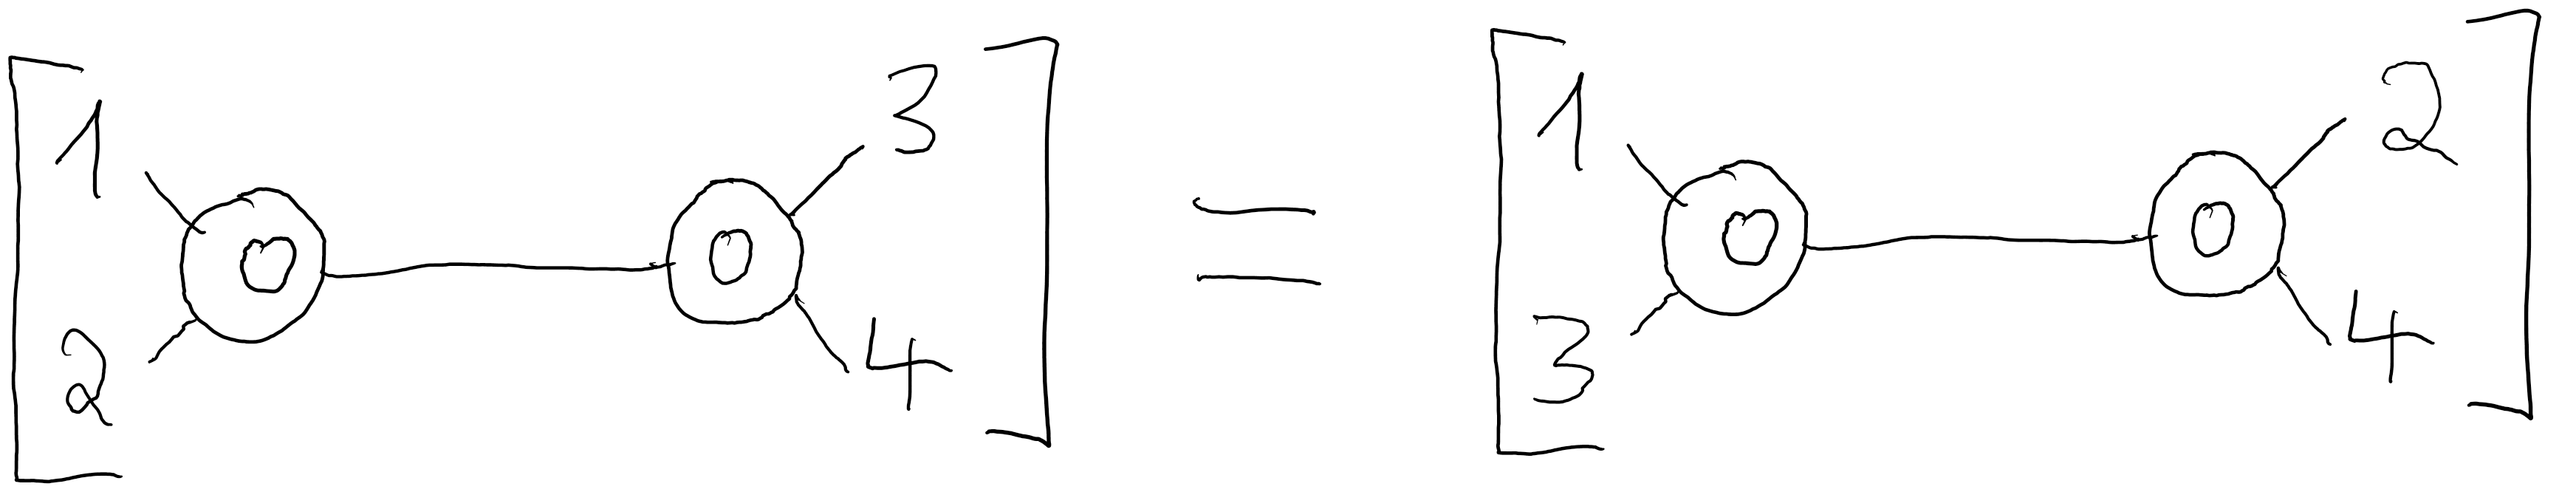

### D) Double ramification cycles
When discussing strata of differentials, we saw that double ramification cycles played an important role for computing them. Again, we'll mostly treat them as a black box, but we'll open the box a little bit to be able to show some cool conjecture.

> **Construction** (Pixton - 2014)<br> 
Let $g,k,d \in \mathbb{Z}_{\geq 0}$ and $A=(a_1, \ldots, a_n) \in \mathbb{Z}^n$ with $\sum_i a_i = k(2g-2+n)$. 
Then for any integer $r \geq 1$ Pixton gave an explicit formula
$$\mathrm{DR}_g^{\,d,k,r}(A) = \sum_{\Gamma,w} \left[\Gamma, \text{(polynomial in $\kappa,\psi$-classes depending on $w$)} \right]\in RH^{2d}(\overline{\mathcal{M}}_{g,n}),$$
where the sum runs over stable graphs $\Gamma$ and *admissible weightings $w$ mod $r$* on $\Gamma$ (some additional combinatorial gadget). The coefficient of each individual term $[\Gamma, \alpha]$ above expression turns out to be a polynomial in $r$ for $r \gg 0$ and we define the DR cycle as the value
$$\mathrm{DR}_g^{\,d,k}(A) = \mathrm{DR}_g^{\,d,k,r}(A)|_{r=0} \in RH^{2d}(\overline{\mathcal{M}}_{g,n})$$
of this polynomial at $r=0$.


The tautological class $\mathrm{DR}_g^{\,d,k}(A)$ is  accessible in `admcycles` by the function `DR_cycle(g,A,d)` and we can even compute $\mathrm{DR}_g^{\,d,k,r}(A)$ using `DR_cycle(g,A,d,rpoly=True)`.

We can use `admcycles` to verify theoretical results about Double ramification cycles in special cases. Take the following result, proving a conjecture by Pixton.

> **Theorem** (Clader, Janda - Jan 2016)<br> 
> Let $g,k,d \in \mathbb{Z}_{\geq 0}$ and $A=(a_1, \ldots, a_n) \in \mathbb{Z}^n$ with $\sum_i a_i = k(2g-2+n)$. Then $\mathrm{DR}_g^{\,d,k}(A)$ vanishes in degree $d>g$.

Let us check the above vanishing in a special case in genus $g=2$.

In [0]:
DR=DR_cycle(2,(2,3,-5),d=2)
DR.is_zero()

In [0]:
DR2=DR_cycle(2,(2,3,-5),d=3)
DR2.is_zero()

## Admissible cover cycles in `admcycles`
In joint work with Jason van Zelm, we studied admissible cover cycles - fundamental classes of loci of curves $(C,p_1, \ldots, p_r)$ in $\overline{\mathcal{M}}_{g,r}$ admitting finite covers $C \to D$ to some curve $D$ of genus $g'\leq g$ such that $p_1, \ldots, p_r$ are ramification points of the cover.

For simplicity, let's restrict ourselves to the case of degree $2$ covers with $g'=0,1$, then we have

\begin{align*}
\mathrm{Hyp}_{g,n,2m} &= \{(C,p_1,\ldots, p_n, q_1, q_1', \ldots, q_m, q_m') : C \text{ hyperelliptic}, p_i\text{ ramification points}, q_j, q_j' \text{ conjugate}\} &\subset M_{g,n+2m}\\
\mathrm{B}_{g,n,2m} &= \{(C,p_1,\ldots, p_n, q_1, q_1', \ldots, q_m, q_m') : C \text{ bielliptic}, p_i\text{ ramification points}, q_j, q_j' \text{ conjugate}\} &\subset M_{g,n+2m}
\end{align*}

Then, [in many cases](https://arxiv.org/pdf/1808.05817.pdf#figure.1), the package `admcycles` can compute the fundamental classes

\begin{align*}
[\overline{\mathrm{Hyp}}_{g,n,2m}], [\overline{\mathrm{B}}_{g,n,2m}] \in H^*(\overline{\mathcal{M}}_{g,n+2m}),
\end{align*}

accessible via the functions `Hyperell(g,n,m)` and `Biell(g,n,m)`.

The cycles are computed by using information from their pullbacks via boundary gluing morphisms. For instance, for $g=g_1+g_2$, consider the gluing morphism

$$\xi: \overline{\mathcal{M}}_{g_1,1} \times \overline{\mathcal{M}}_{g_2,1} \to \overline{\mathcal{M}}_g.$$

Then the pullback of the cycle $[\overline{\mathrm{Hyp}}_g] \in H^*( \overline{\mathcal{M}}_g )$ is given by

$$\xi^* [\overline{\mathrm{Hyp}}_g] = [\overline{\mathrm{Hyp}}_{g_1,1}] \otimes [\overline{\mathrm{Hyp}}_{g_2,1}].$$

In particular, the intersection of $D_{g_1} = \xi_* [ \overline{\mathcal{M}}_{g_1,1} \times \overline{\mathcal{M}}_{g_2,1} ]$ with $[\overline{\mathrm{Hyp}}_g]$ is given by $\alpha = \xi_* [\overline{\mathrm{Hyp}}_{g_1,1}] \otimes [\overline{\mathrm{Hyp}}_{g_2,1}]$. This is something we can again verify in an example, showing how such boundary pushforwards can be constructed.

First we construct the stable graph associated to the boundary divisor.

In [0]:
g1 = 1; g2 = 2; g = g1 + g2;
bdrygraph = StableGraph([g1,g2], [[1],[2]], [(1,2)])
Dg1 = bdrygraph.boundary_pushforward(); Dg1

The class $\alpha = \xi_* [\overline{\mathrm{Hyp}}_{g_1,1}] \otimes [\overline{\mathrm{Hyp}}_{g_2,1}]$ can also be constructed using `boundary_pushforward`.

In [0]:
Hyp_g = Hyperell(g)
alpha = bdrygraph.boundary_pushforward([Hyperell(g1,1), Hyperell(g2,1)])

In [0]:
(Hyp_g * Dg1).toTautbasis()

In [0]:
alpha.toTautbasis()

## Relationship between DR-cycles and admissible cover cycles
There is a natural connection between Double ramification and admissible cover cycles. The cycle $\mathrm{DR}_{g}(A)$ is defined as the pushforward of the moduli space of stable maps to rubber $\mathbb{P}^1$. The components of this rubber moduli space, where generically the curve is smooth, map exactly to the admissible cover cycle of curves $C$ mapping to $\mathbb{P}^1$ with marked ramification points over $0,\infty$.

For covers of degree $2$, the admissible cover cycles above are exactly the hyperelliptic cycles. The possible partitions $A$ are 
* $(2,-2)$ : two marked Weierstrass point
* $(2,-1,-1)$ : one marked Weierstrass point, one pair of conjugate points
* $(1,1,-1,-1)$ : two pairs of conjugate points

As a proof of concept, the above approach can be applied in genus $g=1$.  Here we are looking at the codimension $1$ hyperelliptic cycles

\begin{align*}
\mathrm{Hyp}_{1,2} &= \{(E,p,q) : \mathcal{O}(2p-2q)\cong \mathcal{O}\} &\subset \mathcal{M}_{1,2},\\
\mathrm{Hyp}_{1,1,2} &= \{(E,p,q_1,q_2) : \mathcal{O}(2p-q_1-q_2) \cong \mathcal{O}\} &\subset \mathcal{M}_{1,3},\\
\mathrm{Hyp}_{1,0,4} &= \{(E,p_1,p_2,q_1,q_2) : \mathcal{O}(p_1+p_2-q_1-q_2) \cong \mathcal{O}\} &\subset \mathcal{M}_{1,4}.
\end{align*}

So, in the first case, we know that the cycles $\mathrm{DR}_1(2,-2)$ and $[\overline{\mathrm{Hyp}}_{1,2}]$ agree away from the boundary. Let's use `admcycles` to identify the correction - which must be a combination of the classes of boundary divisors.

In [0]:
DR = DR_cycle(1,(2,-2))
Hyp_1_2 = Hyperell(1,2)
(DR-Hyp_1_2).toTautbasis()

In [0]:
bgraphs = list_strata(1,2,1); bgraphs

In [0]:
[b.boundary_pushforward().toTautbasis() for b in bgraphs]

In [0]:
D_0_2=stgraph([0,1],[[1,2,4],[5]],[(4,5)]).boundary_pushforward() 
# B = Boundary divisor [(g=0;1,2)-(g=1)]

relation1=DR-(Hyp_1_2+D_0_2)
relation1.is_zero()

By similar experiments, one concludes the following formulas:

\begin{align*}
\mathrm{DR}_1(2,-2) &= [\overline{\mathrm{Hyp}}_{1,2}] + [D_{0,2}] &&\in RH^2(\overline{\mathcal{M}}_{1,2}),\\
\mathrm{DR}_1(2,-1,-1) &= [\overline{\mathrm{Hyp}}_{1,1,2}] + [D_{0,3}] &&\in RH^2(\overline{\mathcal{M}}_{1,3}),\\
\mathrm{DR}_1(1,1,-1,-1) &= [\overline{\mathrm{Hyp}}_{1,0,4}] + [D_{0,4}] &&\in RH^2(\overline{\mathcal{M}}_{1,4})
\end{align*}

On Tuesday, we started exploring the case $g=2$ and found/verified a more complicated formula

$$\mathrm{DR}_2(2,-2) = [\overline{\mathrm{Hyp}}_{2,2}] + \text{ boundary corrections.}$$

As a final example, let us verify the following result

> **Theorem** (Holmes, Pixton, S. - Nov 2017)<br>
> Let $\textbf a, \textbf b$ be vectors of $n$ integers with $\sum_i a_i = k_1 (2g-2+n)$ and $\sum_i b_i = k_2 (2g-2+n)$, then we have
> $$\mathrm{DR}_g(\textbf{a}) \cdot \mathrm{DR}_g(\textbf{b}) = \mathrm{DR}_g(\textbf{a}) \cdot \mathrm{DR}_g(\textbf{a}+\textbf{b}) \in H^{4g}({\mathcal{M}}_{g,n}^{ct}),$$
> but the same relation is **not** in general true on all of $\overline{\mathcal{M}}_{g,n}$.

in the case $g=1, n=3$.

In [0]:
R.<a1,a2,a3,b1,b2,b3> = PolynomialRing(QQ,6)
diff = DR_cycle(1,(a1,a2,a3)) * ( DR_cycle(1,(b1,b2,b3)) - DR_cycle(1,(a1+b1,a2+b2,a3+b3)) )

In [0]:
diff.toTautbasis()

In [0]:
diff.is_zero()

In [0]:
diff.toTautbasis(moduli='ct')